# INTRODUCTION


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from biplot import biplot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Extraction et nettoyage des données

Index(['frequence ecouté artiste émergent', 'tempo',
       'fréquence en travaillant', 'fréquence en sport',
       'fréquence en cuisine', 'fréquence en transport',
       'fréquence en passant le temps', 'age'],
      dtype='object')
(221, 8)
  Dimension  Valeur Propre  % valeur propre  % cum. val. prop.
0      Dim1       2.471420             31.0               31.0
1      Dim2       1.154499             14.0               45.0
2      Dim3       1.003228             13.0               58.0
3      Dim4       0.885845             11.0               69.0
4      Dim5       0.721834              9.0               78.0
5      Dim6       0.669911              8.0               86.0


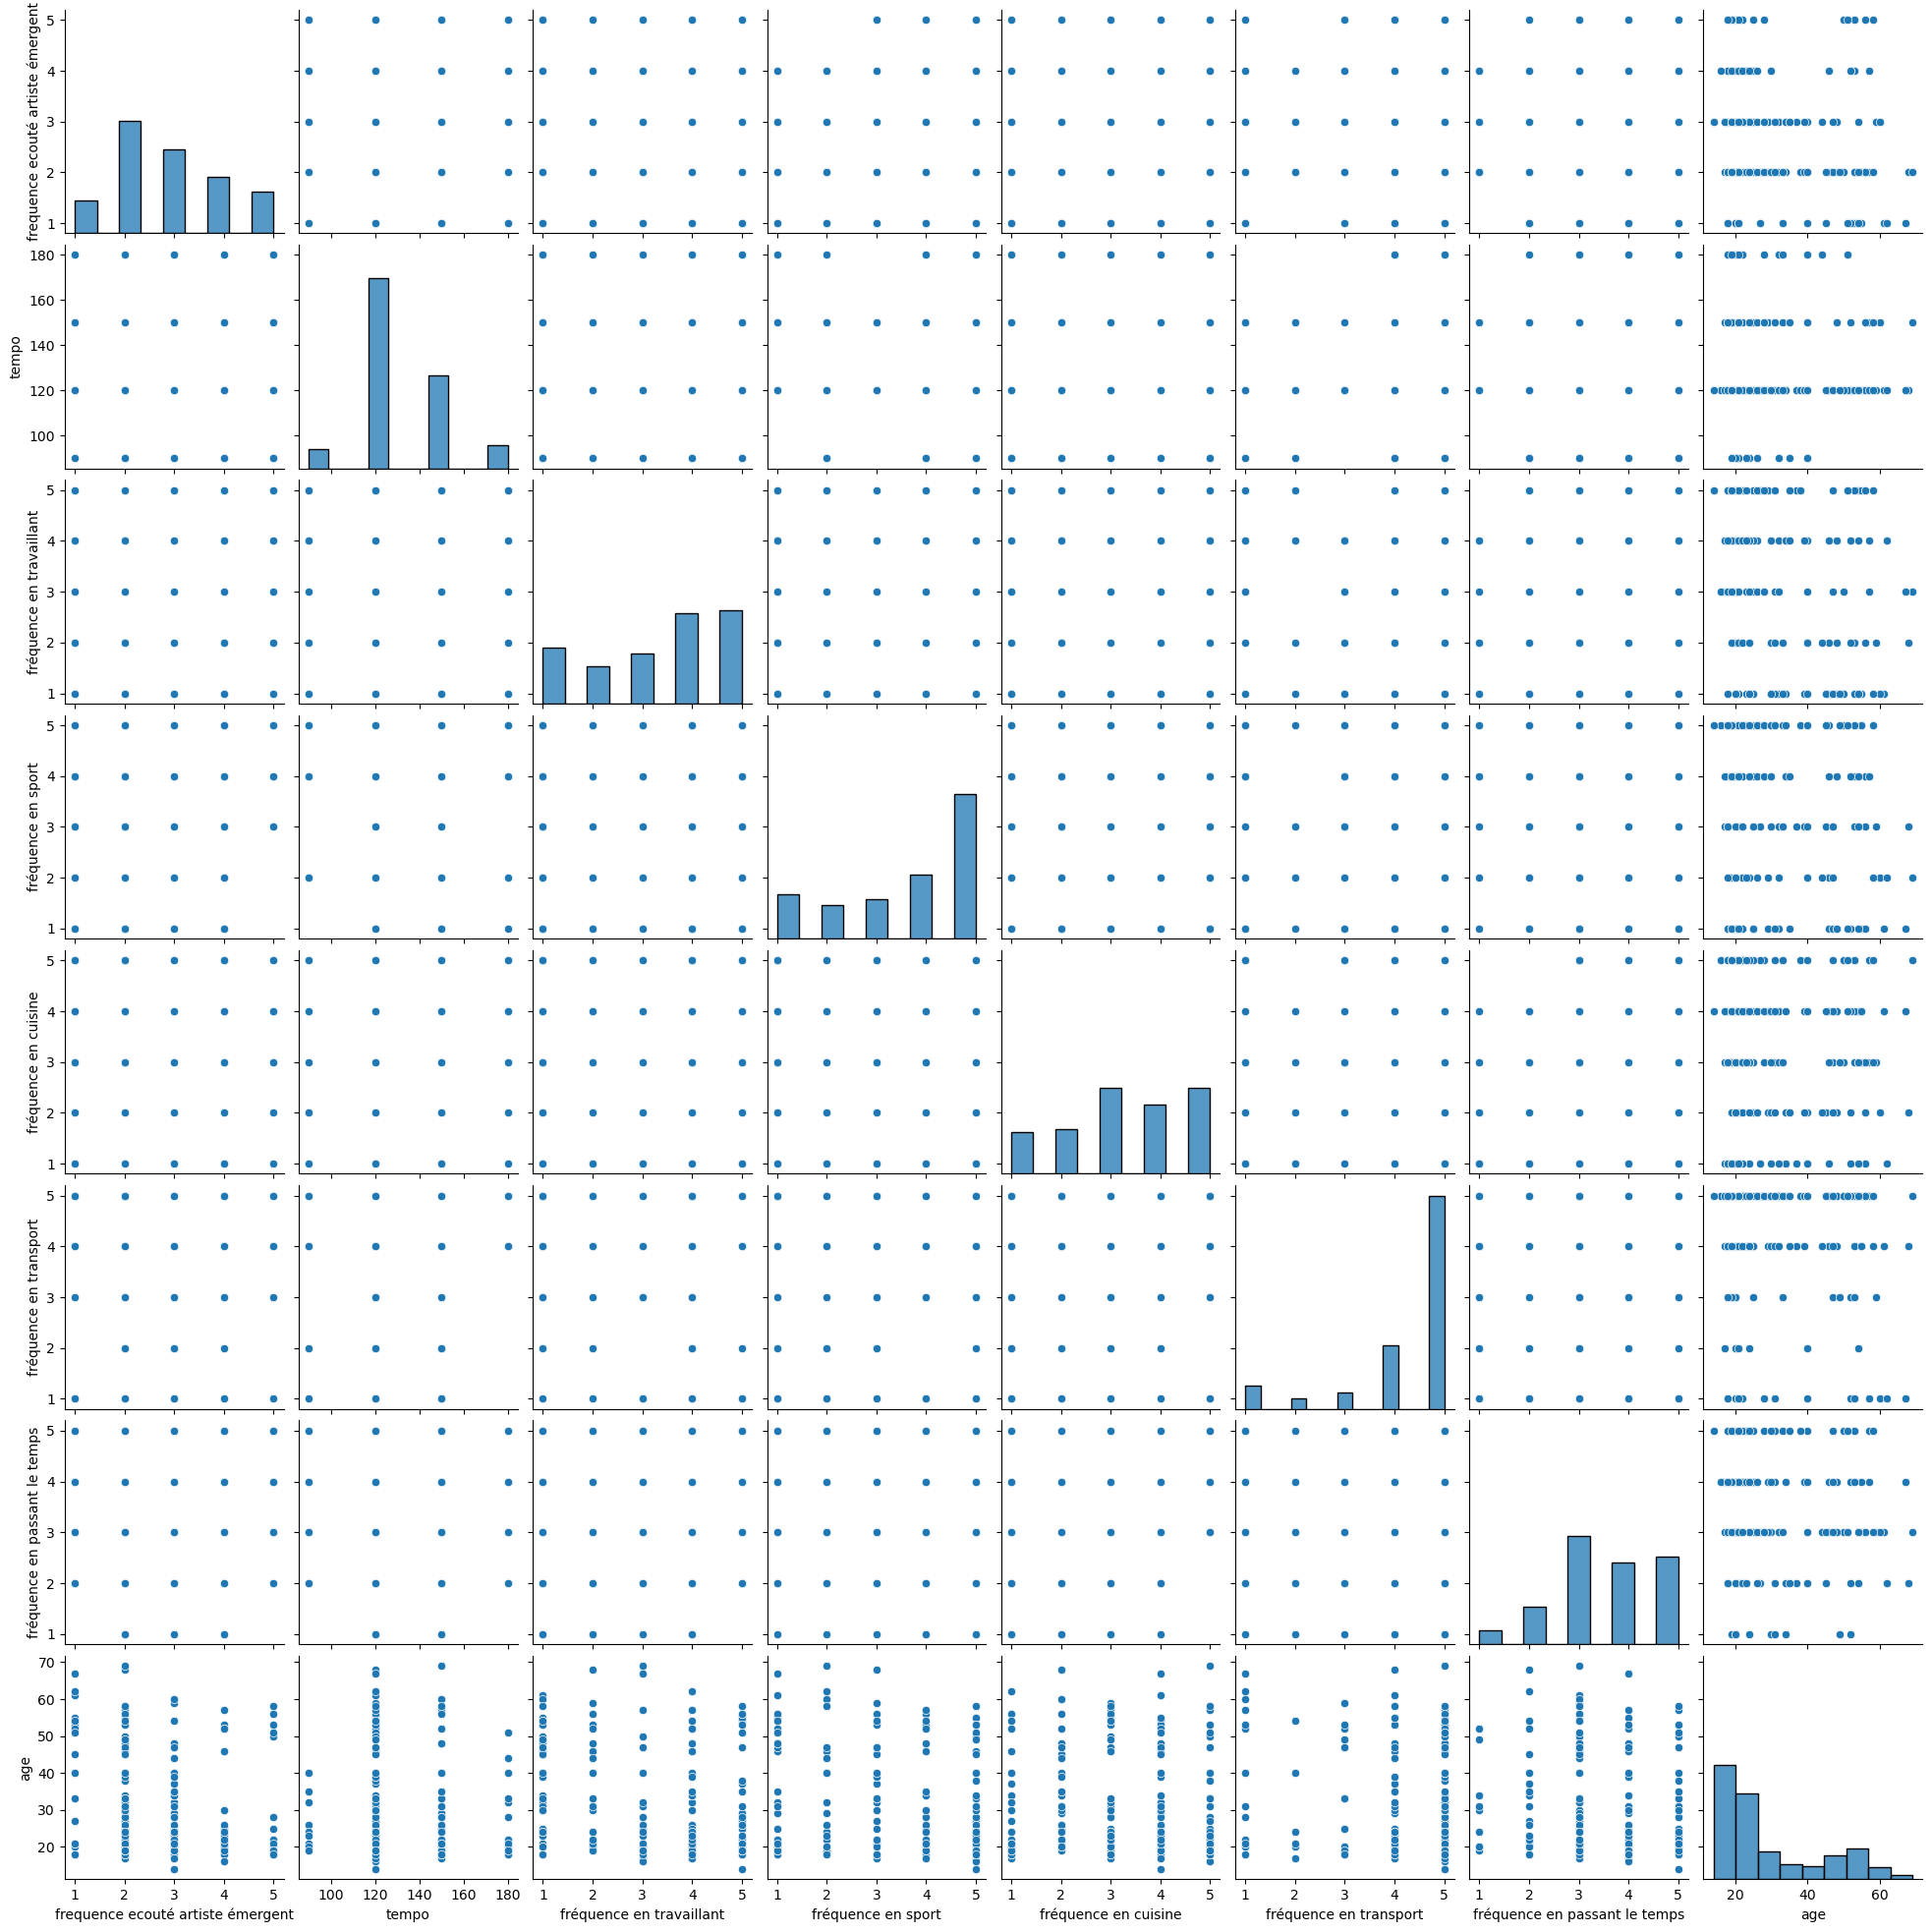

In [8]:
data = pd.read_csv('cleaned_data.csv')
data_quant = data[["frequence ecouté artiste émergent", "tempo", "fréquence en travaillant", "fréquence en sport", "fréquence en cuisine", "fréquence en transport", "fréquence en passant le temps", "age"]].dropna()

n_compo = 6
print(data_quant.columns)
### Visualisation des données
sns.pairplot(data_quant)

temp = data_quant.sub(data_quant.mean())
x_scaled = temp.div(data_quant.std())
print (x_scaled.shape)

pca = PCA(n_components=n_compo)
pca_res = pca.fit_transform(x_scaled)
# print(pca_res)

eig = pd.DataFrame({
    "Dimension" :
        ["Dim" + str(x + 1) for x in range(n_compo)],
    "Valeur Propre" : pca.explained_variance_,
    "% valeur propre" : 
        np.round(pca.explained_variance_ratio_*100),
    "% cum. val. prop." : 
        np.round(np.cumsum(pca.explained_variance_ratio_)*100)
})
print(eig)



### Choix du nombre de components
On a choisi d'avoir trois components car on arrive à un ratio de 77%, ce qui semble ne pas avoir trop de perte

## Graphique des variables

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Nombre anormal de catégories !


ValueError: 'c' argument has 291 elements, which is inconsistent with 'x' and 'y' with size 221.

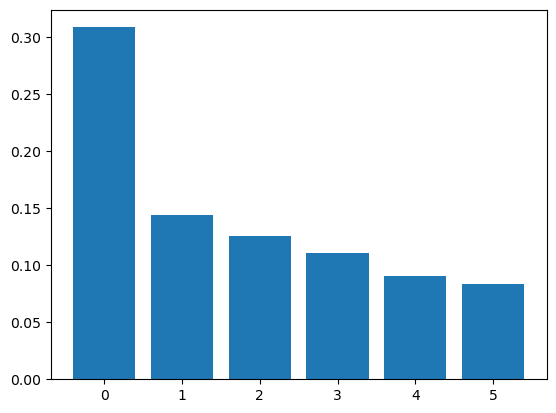

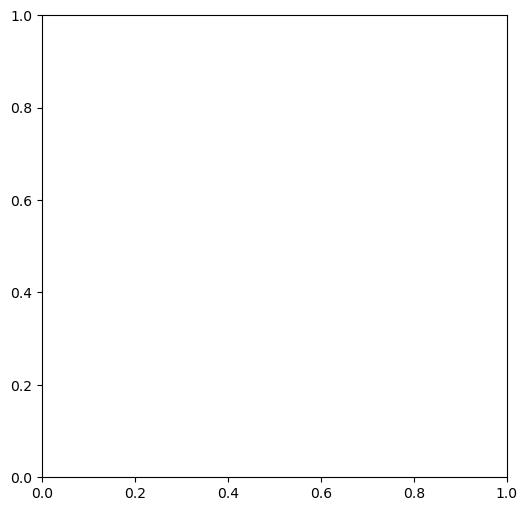

In [17]:
y1 = list(pca.explained_variance_ratio_)
x1 = range(len(y1))
plt.bar(x1, y1)
plt.show

biplot(score = pca_res [:, 0:2],
        coeff = np.transpose(pca.components_[0:2, :]),
        cat = data['genre'],
        coeff_labels=list(data_quant.columns),
        density = False)
plt.show()

## Graphique des individus

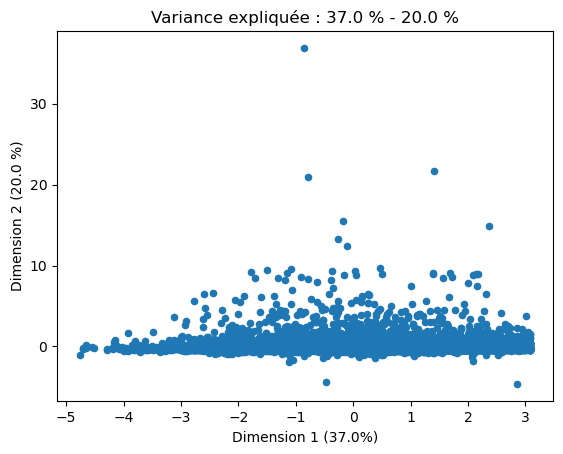

In [5]:
pcadf = pd.DataFrame ({
    "Dim1" : pca_res [ :10000 , 0 ] ,
    "Dim2" : pca_res [ :10000 , 1 ] ,
    "IMDbRating" : data ["IMDbRating"] [ :10000 ]
})
listVariance = np.round(pca.explained_variance_ratio_*100)
pcadf.plot.scatter ("Dim1", "Dim2")
plt.title (f"Variance expliquée : {listVariance[0]} % - {listVariance[1]} %")
plt.xlabel (f"Dimension 1 ({listVariance[0]}%)")
plt.ylabel (f"Dimension 2 ({listVariance[1]} %)")
plt.show( )
